# Initial Training and Testing

## ResNet-50

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import json
from PIL import Image
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import random

from sklearn.datasets import load_files   
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

### Loading and splitting data

In [2]:
with open('./Data/data_2.json', 'r', encoding='UTF-8') as f:
    data = json.load(f)

book_links = data['book_links']
shelf_links = data['shelves']
shelf_values = data['shelf_values']

In [3]:
with open('./Data/data_classes.json', 'r') as f:
    data = json.load(f)

files = []
classes = []

for i in range(len(data)):
    if data[i][1] > -1:
        files.append(data[i][0])
        classes.append(data[i][1])

In [4]:
directory = "./Data/data/images/"

In [5]:
dimensions = (200, 200)
num_classes = 5

In [6]:
shuffle_indices = shuffle(range(len(files)))
train_indices, test_indices = train_test_split(shuffle_indices, test_size=0.25)

In [7]:
X_train = []
y_train = []

for i in train_indices:
    filename = directory + str(i) + ".jpg"
    if os.path.isfile(filename):
        X_train.append(cv2.resize(cv2.imread(filename), dimensions, interpolation=cv2.INTER_LINEAR))
        y_train.append(classes[i])
        
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = []
y_test = []

for i in test_indices:
    filename = directory + str(i) + ".jpg"
    if os.path.isfile(filename):
        X_test.append(cv2.resize(cv2.imread(filename), dimensions, interpolation=cv2.INTER_LINEAR))
        y_test.append(classes[i])
        
X_test = np.array(X_test)
y_test = np.array(y_test)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2464, 200, 200, 3), (2464,), (823, 200, 200, 3), (823,))

In [9]:
with open('Data/X_train.npy', 'wb') as f:
    np.save(f, X_train)
with open('Data/y_train.npy', 'wb') as f:
    np.save(f, y_train)
with open('Data/X_test.npy', 'wb') as f:
    np.save(f, X_test)
with open('Data/y_test.npy', 'wb') as f:
    np.save(f, y_test)

# with open('test.npy', 'rb') as f:

#     a = np.load(f)

#     b = np.load(f)

In [36]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# # Normalize image vectors
# X_train = X_train/255.
# X_test = X_test/255.

In [37]:
y_train[0:5], y_test[0:5], np.eye(num_classes)[y_train.reshape(-1)][0:5], np.eye(num_classes)[y_test.reshape(-1)][0:5]

(array([2, 1, 1, 1, 1]),
 array([1, 1, 1, 2, 1]),
 array([[0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]]),
 array([[0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]]))

#### Testing out model (First Attempt)

In [10]:
# Necessary for ResNet Dense Layer
y_train = np.eye(num_classes)[y_train.reshape(-1)]
y_test = np.eye(num_classes)[y_test.reshape(-1)]

In [14]:
# from keras_applications.resnet import ResNet50
# from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50

In [24]:
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = ResNet50(weights= None, include_top=False, input_shape=(dimensions[0], dimensions[1], 3))

In [32]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [40]:
from keras.optimizers import SGD, Adam
# sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
39/39 [==============================] - 354s 9s/step - loss: 1.8384 - accuracy: 0.5314
Epoch 2/100
39/39 [==============================] - 344s 9s/step - loss: 1.5122 - accuracy: 0.5838
Epoch 3/100
39/39 [==============================] - 355s 9s/step - loss: 1.3020 - accuracy: 0.5951
Epoch 4/100
39/39 [==============================] - 342s 9s/step - loss: 1.2890 - accuracy: 0.6142
Epoch 5/100
39/39 [==============================] - 340s 9s/step - loss: 1.1045 - accuracy: 0.6341
Epoch 6/100
39/39 [==============================] - 341s 9s/step - loss: 1.1333 - accuracy: 0.6402
Epoch 7/100
39/39 [==============================] - 342s 9s/step - loss: 1.0447 - accuracy: 0.6418
Epoch 8/100
39/39 [==============================] - 340s 9s/step - loss: 1.0097 - accuracy: 0.6535
Epoch 9/100
39/39 [==============================] - 336s 9s/step - loss: 0.9922 - accuracy: 0.6572
Epoch 10/100
39/39 [==============================] - 339s 9s/step - loss: 0.9697 - accuracy: 0.6617

In [42]:
preds = model.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

26/26 [==============================] - 33s 1s/step - loss: 3.9194 - accuracy: 0.6290
Loss = 3.9193613529205322
Test Accuracy = 0.628953754901886


In [44]:
model.save('./ModelSaves/ResNet50v1')

INFO:tensorflow:Assets written to: ./ModelSaves/ResNet50v1/assets


INFO:tensorflow:Assets written to: ./ModelSaves/ResNet50v1/assets


In [46]:
model.save('./ModelSaves/ResNet50v1_h5', save_format='h5')

In [48]:
results = model(X_test)

In [49]:
results.shape

TensorShape([822, 5])

In [70]:
rands = [random.randint(0, X_test.shape[0] - 1) for i in range(5)]
rands

[389, 177, 337, 772, 186]

In [75]:
results = model(X_test[rands])

In [83]:
actuals = [-1] * 5

for i in range(len(shuffle_indices)):
    index = shuffle_indices[i]
    filename = directory + str(i) + ".jpg"
    if os.path.isfile(filename):
        cur_img = cv2.resize(cv2.imread(filename), dimensions, interpolation=cv2.INTER_LINEAR)
        for j in range(len(rands)):
            if np.allclose(cur_img, X_test[rands[j]]):
                actuals[j] = i
                    
actuals

[1390, 778, 1351, 915, 884]

In [86]:
[classes[i] for i in actuals]

[1, 1, 1, 2, 2]

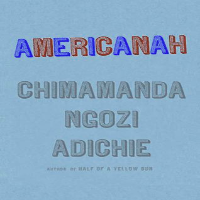

Sadness


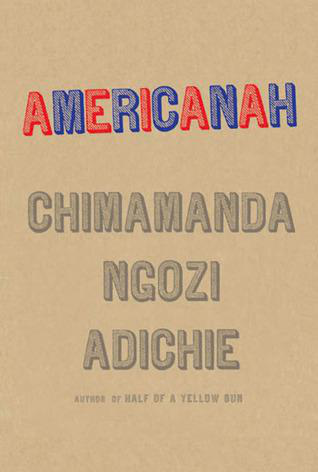

Sadness


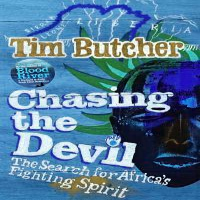

Sadness


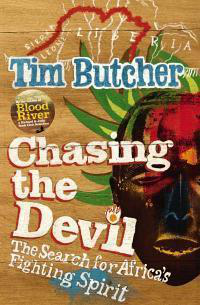

Sadness


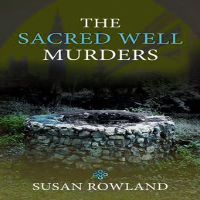

Sadness


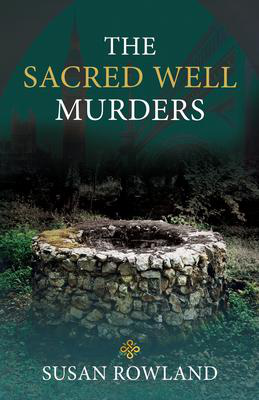

Sadness


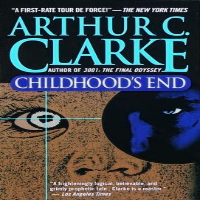

Sadness


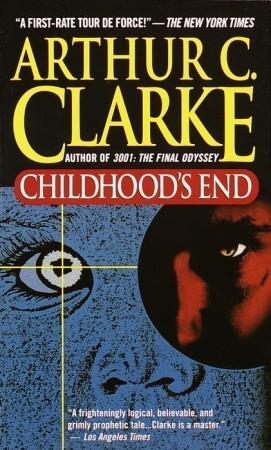

Fear


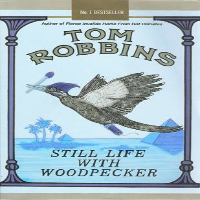

Sadness


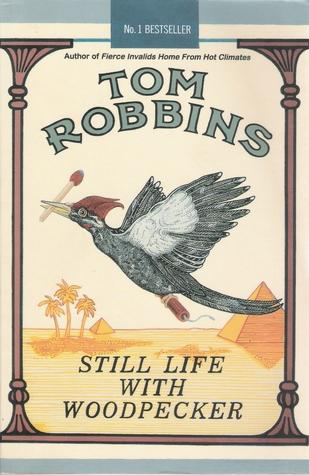

Fear


In [87]:
emotions = ["Happiness", "Sadness", "Fear", "Disgust", "Anger", "Surprise"]

for i in range(len(results)):
    display(Image.fromarray(X_test[rands[i]]))
    print(emotions[np.argmax(results[i])])
    display(Image.open(directory + str(actuals[i]) + ".jpg"))
    print(emotions[classes[actuals[i]]])

#### Testing out model (Oversampling)

In [11]:
ros = RandomOverSampler()

X_train_ros, y_train_ros = ros.fit_resample(
    X_train.reshape((-1, X_train.shape[1] * X_train.shape[2] * X_train.shape[3])),
    y_train
)

X_train_ros = X_train_ros.reshape((-1, X_train.shape[1], X_train.shape[2], X_train.shape[3]))
X_train_ros.shape, y_train_ros.shape

((8405, 200, 200, 3), (8405,))

In [12]:
# Necessary for ResNet Dense Layer
# y_train_ros = np.eye(num_classes)[y_train_ros.reshape(-1)]
y_test = np.eye(num_classes)[y_test.reshape(-1)]

In [13]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(weights= None, include_top=False, input_shape=(dimensions[0], dimensions[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

from keras.optimizers import SGD, Adam
# sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(X_train_ros, y_train_ros, epochs=100, batch_size=64)

Epoch 1/100
130/130 [==============================] - 1258s 10s/step - loss: 1.8557 - accuracy: 0.4177
Epoch 2/100
130/130 [==============================] - 1290s 10s/step - loss: 0.9924 - accuracy: 0.6001
Epoch 3/100
130/130 [==============================] - 1270s 10s/step - loss: 0.7423 - accuracy: 0.6948
Epoch 4/100
130/130 [==============================] - 1248s 10s/step - loss: 0.5806 - accuracy: 0.7423
Epoch 5/100
130/130 [==============================] - 1315s 10s/step - loss: 0.4463 - accuracy: 0.7904
Epoch 6/100
130/130 [==============================] - 1270s 10s/step - loss: 0.3342 - accuracy: 0.8459
Epoch 7/100
130/130 [==============================] - 1271s 10s/step - loss: 0.2969 - accuracy: 0.8732
Epoch 8/100
130/130 [==============================] - 1211s 9s/step - loss: 0.2299 - accuracy: 0.8993
Epoch 9/100
130/130 [==============================] - 1452s 11s/step - loss: 0.2027 - accuracy: 0.9239
Epoch 10/100
130/130 [==============================] - 1231s 9s/

In [14]:
model.fit(X_train_ros, y_train_ros, epochs=25, batch_size=64)

Epoch 1/25
132/132 [==============================] - 1180s 9s/step - loss: 2.0631 - accuracy: 0.3792
Epoch 2/25
132/132 [==============================] - 1125s 9s/step - loss: 1.0150 - accuracy: 0.6178
Epoch 3/25
132/132 [==============================] - 1115s 8s/step - loss: 0.7566 - accuracy: 0.6878
Epoch 4/25
132/132 [==============================] - 1116s 8s/step - loss: 0.5423 - accuracy: 0.7667
Epoch 5/25
132/132 [==============================] - 1146s 9s/step - loss: 0.4451 - accuracy: 0.8000
Epoch 6/25
132/132 [==============================] - 1203s 9s/step - loss: 0.3526 - accuracy: 0.8447
Epoch 7/25
132/132 [==============================] - 1156s 9s/step - loss: 0.2993 - accuracy: 0.8807
Epoch 8/25
132/132 [==============================] - 1153s 9s/step - loss: 0.2514 - accuracy: 0.8953
Epoch 9/25
132/132 [==============================] - 1194s 9s/step - loss: 0.1634 - accuracy: 0.9361
Epoch 10/25
132/132 [==============================] - 1108s 8s/step - loss: 0.173

In [15]:
preds = model.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

26/26 [==============================] - 31s 1s/step - loss: 2.2845 - accuracy: 0.5735
Loss = 2.284522533416748
Test Accuracy = 0.57351154088974


In [16]:
model.save('./ModelSaves/ResNet50v3')

INFO:tensorflow:Assets written to: ./ModelSaves/ResNet50v3/assets


INFO:tensorflow:Assets written to: ./ModelSaves/ResNet50v3/assets


In [17]:
model.save('./ModelSaves/ResNet50v3_h5', save_format='h5')

...training
done training
[234, 977, 2286, 2721, 1459]
/book/show/13623848-the-song-of-achilles


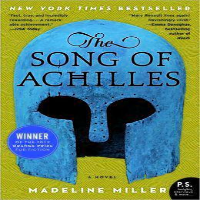

Sadness


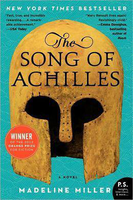

Sadness
/book/show/41057294-normal-people


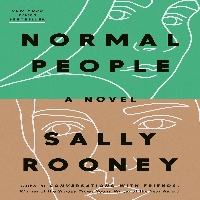

Sadness


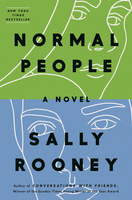

Happiness
/book/show/25489625-between-the-world-and-me


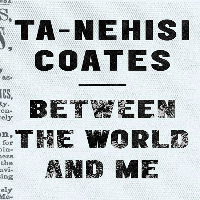

Sadness


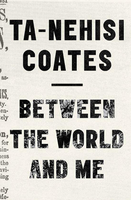

Fear
/book/show/33643994-daughter-of-the-pirate-king


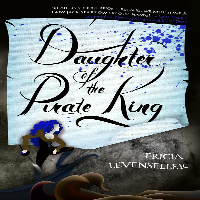

Sadness


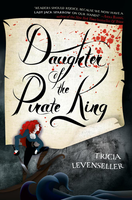

Disgust
/book/show/15724396-the-sword-of-summer


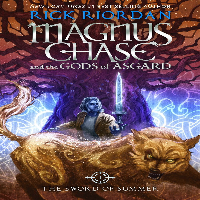

Sadness


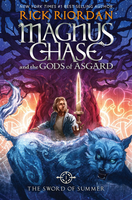

Anger


In [18]:
emotions = ["Happiness", "Sadness", "Fear", "Disgust", "Anger", "Surprise"]

emotion_presence = set()

rands = []

while len(rands) < 5:
    pos = random.randint(0, len(test_indices) - 1)
    if emotions[classes[test_indices[pos]]] not in emotion_presence:
        rands.append(pos)
        emotion_presence.add(emotions[classes[test_indices[pos]]])

print("...training")
        
results = model(X_test[rands])

print("done training")

actuals = [test_indices[pos] for pos in rands]
print(actuals)

for i in range(len(results)):
    print('========================================================')
    print(book_links[actuals[i]])
    display(Image.fromarray(X_test[rands[i]]))
    print(emotions[np.argmax(results[i])])
    im = Image.open(directory + str(actuals[i]) + ".jpg")
    im.thumbnail(dimensions, Image.ANTIALIAS)
    display(im)
    print(emotions[classes[actuals[i]]])
    print('========================================================')

#### Testing out model (SMOTE)

In [18]:
smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(
    X_train.reshape((-1, X_train.shape[1] * X_train.shape[2] * X_train.shape[3])),
    y_train
)
# ros.fit_resample(
#     X_train.reshape((-1, X_train.shape[1] * X_train.shape[2] * X_train.shape[3])),
#     y_train
# )

X_train_smote = X_train_smote.reshape((-1, X_train.shape[1], X_train.shape[2], X_train.shape[3]))
X_train_smote.shape, y_train_smote.shape

((8410, 200, 200, 3), (8410,))

In [20]:
# Necessary for ResNet Dense Layer
y_train_smote = np.eye(num_classes)[y_train_smote.reshape(-1)]
y_test = np.eye(num_classes)[y_test.reshape(-1)]

In [21]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(weights= None, include_top=False, input_shape=(dimensions[0], dimensions[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

from keras.optimizers import SGD, Adam
# sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(X_train_smote, y_train_smote, epochs=25, batch_size=64)

Epoch 1/25
132/132 [==============================] - 3005s 23s/step - loss: 2.4238 - accuracy: 0.2616
Epoch 2/25
132/132 [==============================] - 2956s 22s/step - loss: 1.5742 - accuracy: 0.4473
Epoch 3/25
132/132 [==============================] - 2947s 22s/step - loss: 1.1656 - accuracy: 0.5794
Epoch 4/25
132/132 [==============================] - 2974s 23s/step - loss: 0.9151 - accuracy: 0.6536
Epoch 5/25
132/132 [==============================] - 2945s 22s/step - loss: 0.8308 - accuracy: 0.6855
Epoch 6/25
132/132 [==============================] - 2952s 22s/step - loss: 0.7412 - accuracy: 0.7153
Epoch 7/25
132/132 [==============================] - 2947s 22s/step - loss: 0.6908 - accuracy: 0.7369
Epoch 8/25
132/132 [==============================] - 2935s 22s/step - loss: 0.5948 - accuracy: 0.7784
Epoch 9/25
132/132 [==============================] - 2950s 22s/step - loss: 0.5133 - accuracy: 0.8025
Epoch 10/25
132/132 [==============================] - 2946s 22s/step - l

In [24]:
preds = model.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

26/26 [==============================] - 69s 3s/step - loss: 2.6278 - accuracy: 0.6379
Loss = 2.6277992725372314
Test Accuracy = 0.6379100680351257


In [47]:
preds = model(X_test)
len(preds), np.unique(preds, return_counts=True)

(823,
 (array([0.0751321 , 0.10159917, 0.10775502, ..., 0.40817234, 0.41116565,
         0.41692716], dtype=float32),
  array([1, 1, 1, ..., 1, 1, 1], dtype=int64)))

In [36]:
y_test[0:5]

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [37]:
np.sum(np.argmax(preds, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)

0.637910085054678

In [38]:
np.unique(np.argmax(preds, axis=1), return_counts=True)

(array([0, 1, 2, 4], dtype=int64), array([ 15, 750,  56,   2], dtype=int64))

In [25]:
model.save('./ModelSaves/ResNet50v4')

INFO:tensorflow:Assets written to: ./ModelSaves/ResNet50v4\assets


INFO:tensorflow:Assets written to: ./ModelSaves/ResNet50v4\assets


In [26]:
model.save('./ModelSaves/ResNet50v4_h5', save_format='h5')

...training
done training
[574, 1389, 1735, 2721, 2233]
/book/show/77767.Little_House_on_the_Prairie


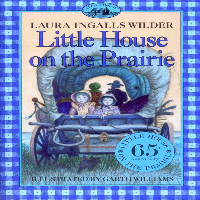

Sadness


C:\Users\Brian\AppData\Local\Temp\ipykernel_23124\1498559064.py:28: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im.thumbnail(dimensions, Image.ANTIALIAS)


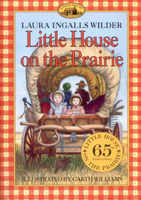

Sadness
/book/show/49540.Les_Liaisons_dangereuses


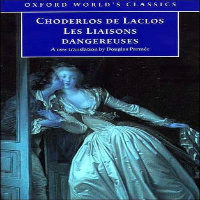

Sadness


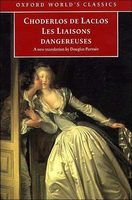

Fear
/book/show/32283133-origin


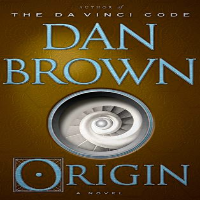

Sadness


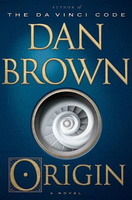

Happiness
/book/show/33643994-daughter-of-the-pirate-king


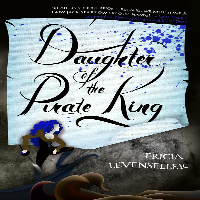

Sadness


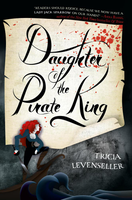

Disgust
/book/show/30760409-the-arbitrator


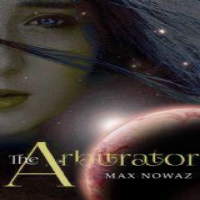

Sadness


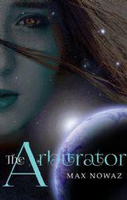

Anger


In [27]:
emotions = ["Happiness", "Sadness", "Fear", "Disgust", "Anger", "Surprise"]

emotion_presence = set()

rands = []

while len(rands) < 5:
    pos = random.randint(0, len(test_indices) - 1)
    if emotions[classes[test_indices[pos]]] not in emotion_presence:
        rands.append(pos)
        emotion_presence.add(emotions[classes[test_indices[pos]]])

print("...training")
        
results = model(X_test[rands])

print("done training")

actuals = [test_indices[pos] for pos in rands]
print(actuals)

for i in range(len(results)):
    print('========================================================')
    print(book_links[actuals[i]])
    display(Image.fromarray(X_test[rands[i]]))
    print(emotions[np.argmax(results[i])])
    im = Image.open(directory + str(actuals[i]) + ".jpg")
    im.thumbnail(dimensions, Image.ANTIALIAS)
    display(im)
    print(emotions[classes[actuals[i]]])
    print('========================================================')

#### Undersampling

In [43]:
rus = RandomUnderSampler()

X_train_rus, y_train_rus = rus.fit_resample(
    X_train.reshape((-1, X_train.shape[1] * X_train.shape[2] * X_train.shape[3])),
    y_train
)

X_train_rus = X_train_rus.reshape((-1, X_train.shape[1], X_train.shape[2], X_train.shape[3]))
X_train_rus.shape, y_train_rus.shape

((75, 200, 200, 3), (75,))

In [44]:
# Necessary for ResNet Dense Layer
y_train_rus = np.eye(num_classes)[y_train_rus.reshape(-1)]
# y_test = np.eye(num_classes)[y_test.reshape(-1)]

In [45]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(weights= None, include_top=False, input_shape=(dimensions[0], dimensions[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

from keras.optimizers import SGD, Adam
# sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
model.fit(X_train_rus, y_train_rus, epochs=25, batch_size=64)

Epoch 1/25
2/2 [==============================] - 61s 4s/step - loss: 3.1984 - accuracy: 0.2800
Epoch 2/25
2/2 [==============================] - 28s 4s/step - loss: 2.8902 - accuracy: 0.1067
Epoch 3/25
2/2 [==============================] - 27s 4s/step - loss: 3.0884 - accuracy: 0.1867
Epoch 4/25
2/2 [==============================] - 27s 4s/step - loss: 2.6466 - accuracy: 0.3333
Epoch 5/25
2/2 [==============================] - 27s 4s/step - loss: 2.6598 - accuracy: 0.2133
Epoch 6/25
2/2 [==============================] - 27s 4s/step - loss: 2.4936 - accuracy: 0.2267
Epoch 7/25
2/2 [==============================] - 27s 4s/step - loss: 2.2622 - accuracy: 0.2933
Epoch 8/25
2/2 [==============================] - 28s 4s/step - loss: 2.3213 - accuracy: 0.2533
Epoch 9/25
2/2 [==============================] - 31s 4s/step - loss: 2.8174 - accuracy: 0.1467
Epoch 10/25
2/2 [==============================] - 32s 5s/step - loss: 2.7339 - accuracy: 0.1733
Epoch 11/25
2/2 [======================

In [48]:
preds = model.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

26/26 [==============================] - 73s 3s/step - loss: 1.7097 - accuracy: 0.0194
Loss = 1.7097039222717285
Test Accuracy = 0.019441070035099983


In [49]:
model.save('./ModelSaves/ResNet50v5_rus')

INFO:tensorflow:Assets written to: ./ModelSaves/ResNet50v5_rus\assets


INFO:tensorflow:Assets written to: ./ModelSaves/ResNet50v5_rus\assets


In [50]:
model.save('./ModelSaves/ResNet50v5_rus_h5', save_format='h5')

...training
done training
[1196, 914, 358, 2354, 2345]
/book/show/389627.Diary_of_a_Wimpy_Kid


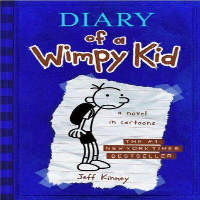

Disgust


C:\Users\Brian\AppData\Local\Temp\ipykernel_23124\1498559064.py:28: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im.thumbnail(dimensions, Image.ANTIALIAS)


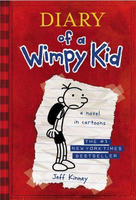

Sadness
/book/show/13517535-thoughtless


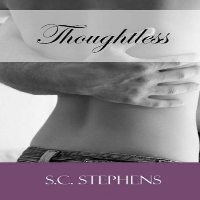

Anger


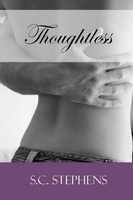

Fear
/book/show/15195.The_Complete_Maus


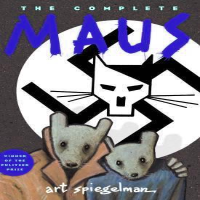

Anger


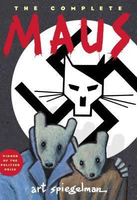

Happiness
/book/show/6686101-plague


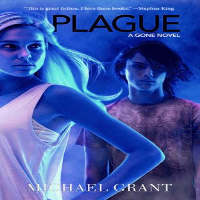

Anger


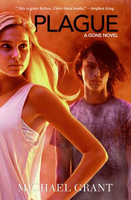

Disgust
/book/show/53450218-the-past


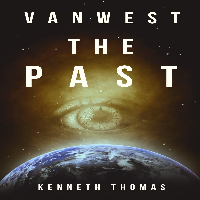

Anger


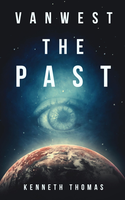

Anger


In [54]:
emotions = ["Happiness", "Sadness", "Fear", "Disgust", "Anger", "Surprise"]

emotion_presence = set()

rands = []

while len(rands) < 5:
    pos = random.randint(0, len(test_indices) - 1)
    if emotions[classes[test_indices[pos]]] not in emotion_presence:
        rands.append(pos)
        emotion_presence.add(emotions[classes[test_indices[pos]]])

print("...training")
        
results = model(X_test[rands])

print("done training")

actuals = [test_indices[pos] for pos in rands]
print(actuals)

for i in range(len(results)):
    print('========================================================')
    print(book_links[actuals[i]])
    display(Image.fromarray(X_test[rands[i]]))
    print(emotions[np.argmax(results[i])])
    im = Image.open(directory + str(actuals[i]) + ".jpg")
    im.thumbnail(dimensions, Image.ANTIALIAS)
    display(im)
    print(emotions[classes[actuals[i]]])
    print('========================================================')

#### Focal Loss

In [59]:
# Necessary for ResNet Dense Layer
X_train_focal = X_train
y_train_focal = np.eye(num_classes)[y_train.reshape(-1)]
# y_test = np.eye(num_classes)[y_test.reshape(-1)]

In [67]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(weights= None, include_top=False, input_shape=(dimensions[0], dimensions[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

from keras.optimizers import SGD, Adam
from tensorflow_addons.losses import SigmoidFocalCrossEntropy
# sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss=SigmoidFocalCrossEntropy(), metrics=['accuracy'])
# model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
model.fit(X_train_focal, y_train_focal, epochs=25, batch_size=64)

Epoch 1/25
39/39 [==============================] - 1039s 26s/step - loss: 0.9517 - accuracy: 0.4338
Epoch 2/25
39/39 [==============================] - 918s 23s/step - loss: 0.7440 - accuracy: 0.4460
Epoch 3/25
39/39 [==============================] - 893s 23s/step - loss: 0.6360 - accuracy: 0.5037
Epoch 4/25
39/39 [==============================] - 958s 25s/step - loss: 0.4981 - accuracy: 0.5150
Epoch 5/25
39/39 [==============================] - 896s 23s/step - loss: 0.4263 - accuracy: 0.5175
Epoch 6/25
39/39 [==============================] - 877s 22s/step - loss: 0.3493 - accuracy: 0.5751
Epoch 7/25
39/39 [==============================] - 876s 22s/step - loss: 0.3093 - accuracy: 0.5739
Epoch 8/25
39/39 [==============================] - 881s 23s/step - loss: 0.3356 - accuracy: 0.5844
Epoch 9/25
39/39 [==============================] - 874s 22s/step - loss: 0.3073 - accuracy: 0.5816
Epoch 10/25
39/39 [==============================] - 867s 22s/step - loss: 0.3043 - accuracy: 0.615

In [69]:
preds = model.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

26/26 [==============================] - 90s 3s/step - loss: 0.1813 - accuracy: 0.6768
Loss = 0.181303933262825
Test Accuracy = 0.6767922043800354


In [70]:
model.save('./ModelSaves/ResNet50v6_focal')

INFO:tensorflow:Assets written to: ./ModelSaves/ResNet50v6_focal\assets


INFO:tensorflow:Assets written to: ./ModelSaves/ResNet50v6_focal\assets


In [71]:
model.save('./ModelSaves/ResNet50v6_focal_h5', save_format='h5')

In [73]:
preds = model(X_test)

In [74]:
preds[0:5]

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.1661631 , 0.5138738 , 0.22873992, 0.04947135, 0.04175187],
       [0.16582745, 0.50269413, 0.23227854, 0.05546436, 0.04373555],
       [0.23986672, 0.45703575, 0.21390569, 0.05580137, 0.03339035],
       [0.22703542, 0.50154644, 0.17479911, 0.06329326, 0.0333258 ],
       [0.30106056, 0.48030213, 0.18140078, 0.02693981, 0.01029674]],
      dtype=float32)>

In [81]:
np.sum(np.argmax(preds, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)

0.6767922235722965

In [82]:
np.unique(np.argmax(preds, axis=1), return_counts=True)

(array([1], dtype=int64), array([823], dtype=int64))

1
/book/show/35425827-archenemies


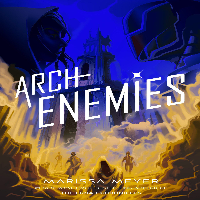

Sadness


C:\Users\Brian\AppData\Local\Temp\ipykernel_23124\30213179.py:30: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im.thumbnail(dimensions, Image.ANTIALIAS)


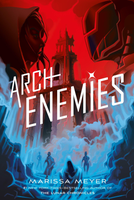

Fear
/book/show/15812814-crossed


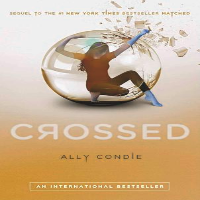

Sadness


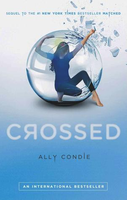

Fear
/book/show/12969140-persona-normal


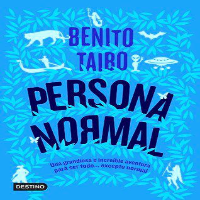

Sadness


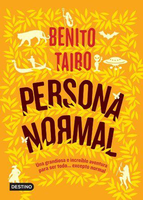

Happiness
/book/show/16064647-awoken


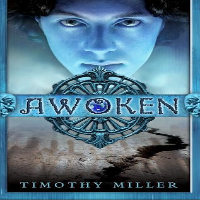

Sadness


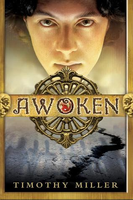

Disgust
/book/show/13600318-reckless


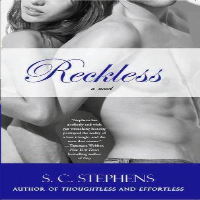

Sadness


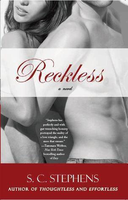

Anger


In [80]:
emotions = ["Happiness", "Sadness", "Fear", "Disgust", "Anger", "Surprise"]

emotion_presence = set()

rands = []

shuffle_indices = shuffle(range(len(preds)))

for i in shuffle_indices:
    if emotions[classes[i]] not in emotion_presence and np.argmax(preds[i]) == classes[i]:
        rands.append(i)
        emotion_presence.add(emotions[classes[i]])

print(len(rands))

while len(rands) < 5:
    pos = random.randint(0, len(test_indices) - 1)
    if emotions[classes[test_indices[pos]]] not in emotion_presence:
        rands.append(pos)
        emotion_presence.add(emotions[classes[test_indices[pos]]])

actuals = [test_indices[pos] for pos in rands]

for i in range(len(results)):
    print('========================================================')
    print(book_links[actuals[i]])
    display(Image.fromarray(X_test[rands[i]]))
    print(emotions[np.argmax(preds[i])])
    im = Image.open(directory + str(actuals[i]) + ".jpg")
    im.thumbnail(dimensions, Image.ANTIALIAS)
    display(im)
    print(emotions[classes[actuals[i]]])
    print('========================================================')

#### Focal Loss with SGD

In [10]:
# Necessary for ResNet Dense Layer
X_train_focal_sgd = X_train
y_train_focal_sgd = np.eye(num_classes)[y_train.reshape(-1)]
# y_test = np.eye(num_classes)[y_test.reshape(-1)]

In [11]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(weights= None, include_top=False, input_shape=(dimensions[0], dimensions[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

from keras.optimizers import SGD, Adam
from tensorflow_addons.losses import SigmoidFocalCrossEntropy
sgd = SGD(learning_rate=0.0001, momentum=0.9, nesterov=False)
# adam = Adam(learning_rate=0.0001)
model.compile(optimizer=sgd, loss=SigmoidFocalCrossEntropy(), metrics=['accuracy'])
# model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Brian\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [14]:
model.fit(X_train_focal_sgd, y_train_focal_sgd, epochs=25, batch_size=64)

Epoch 1/25
39/39 [==============================] - 834s 21s/step - loss: 0.7959 - accuracy: 0.4789
Epoch 2/25
39/39 [==============================] - 784s 20s/step - loss: 0.4006 - accuracy: 0.5678
Epoch 3/25
39/39 [==============================] - 775s 20s/step - loss: 0.4469 - accuracy: 0.5670
Epoch 4/25
39/39 [==============================] - 771s 20s/step - loss: 0.3226 - accuracy: 0.6234
Epoch 5/25
39/39 [==============================] - 778s 20s/step - loss: 0.3548 - accuracy: 0.6161
Epoch 6/25
39/39 [==============================] - 774s 20s/step - loss: 0.4294 - accuracy: 0.6331
Epoch 7/25
39/39 [==============================] - 777s 20s/step - loss: 0.3440 - accuracy: 0.6311
Epoch 8/25
39/39 [==============================] - 777s 20s/step - loss: 0.3502 - accuracy: 0.6006
Epoch 9/25
39/39 [==============================] - 779s 20s/step - loss: 0.3804 - accuracy: 0.6153
Epoch 10/25
39/39 [==============================] - 782s 20s/step - loss: 0.3392 - accuracy: 0.5982

In [15]:
preds = model.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

26/26 [==============================] - 60s 2s/step - loss: -6.5744 - accuracy: 0.0000e+00
Loss = -6.574352264404297
Test Accuracy = 0.0


In [16]:
model.save('./ModelSaves/ResNet50v7_focal_sgd')

INFO:tensorflow:Assets written to: ./ModelSaves/ResNet50v7_focal_sgd\assets


INFO:tensorflow:Assets written to: ./ModelSaves/ResNet50v7_focal_sgd\assets


In [17]:
model.save('./ModelSaves/ResNet50v7_focal_sgd_h5', save_format='h5')

In [18]:
preds = model(X_test)

In [19]:
preds[0:5]

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.1478841 , 0.4492375 , 0.29134044, 0.05668443, 0.05485355],
       [0.14780554, 0.45148745, 0.2838202 , 0.05852443, 0.05836234],
       [0.15107164, 0.47488663, 0.26407012, 0.04887993, 0.06109167],
       [0.14460836, 0.48385268, 0.2763721 , 0.05055109, 0.04461584],
       [0.14144081, 0.46808472, 0.2834551 , 0.056106  , 0.05091329]],
      dtype=float32)>

In [20]:
np.sum(np.argmax(preds, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
np.unique(np.argmax(preds, axis=1), return_counts=True)

In [ ]:
emotions = ["Happiness", "Sadness", "Fear", "Disgust", "Anger", "Surprise"]

emotion_presence = set()

rands = []

shuffle_indices = shuffle(range(len(preds)))

for i in shuffle_indices:
    if emotions[classes[i]] not in emotion_presence and np.argmax(preds[i]) == classes[i]:
        rands.append(i)
        emotion_presence.add(emotions[classes[i]])

print(len(rands))

while len(rands) < 5:
    pos = random.randint(0, len(test_indices) - 1)
    if emotions[classes[test_indices[pos]]] not in emotion_presence:
        rands.append(pos)
        emotion_presence.add(emotions[classes[test_indices[pos]]])

actuals = [test_indices[pos] for pos in rands]

for i in range(len(results)):
    print('========================================================')
    print(book_links[actuals[i]])
    display(Image.fromarray(X_test[rands[i]]))
    print(emotions[np.argmax(preds[i])])
    im = Image.open(directory + str(actuals[i]) + ".jpg")
    im.thumbnail(dimensions, Image.ANTIALIAS)
    display(im)
    print(emotions[classes[actuals[i]]])
    print('========================================================')